In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', 999)
pd.set_option('display.float_format', lambda x: '%.3f' % x)


import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

[Learn about tonight's data](https://data.cityofchicago.org/Public-Safety/Strategic-Subject-List/4aki-r3np/about)

In [2]:
df = pd.read_csv("../../assets/Strategic_Subject_List.csv", low_memory=False)

In [3]:
df.head()

SSL SCORE PREDICTOR RAT AGE AT LATEST ARREST  \
0        500                              20-30   
1        500                              20-30   
2        500                       less than 20   
3        500                       less than 20   
4        500                       less than 20   

   PREDICTOR RAT VICTIM SHOOTING INCIDENTS  \
0                                        0   
1                                        0   
2                                        1   
3                                        1   
4                                        0   

   PREDICTOR RAT VICTIM BATTERY OR ASSAULT  \
0                                        1   
1                                        9   
2                                        2   
3                                        1   
4                                        0   

   PREDICTOR RAT ARRESTS VIOLENT OFFENSES  PREDICTOR RAT GANG AFFILIATION  \
0                                       4                               1   
1                                       1                               1   
2                                       1                               1   
3                                       4                               1   
4                                       5                               0   

   PREDICTOR RAT NARCOTIC ARRESTS  PREDICTOR RAT TREND IN CRIMINAL ACTIVITY  \
0                               1                                     1.000   
1                               0                                     1.000   
2                               3                                     1.000   
3                               0                                     1.600   
4                               0                                     1.300   

   PREDICTOR RAT UUW ARRESTS SEX CODE CD RACE CODE CD WEAPON I DRUG I  \
0                          1           M          BLK        Y      N   
1                          0           M          WHI        N      N   
2                          0           M          WHI        N      N   
3                          1           M          BLK        Y      N   
4                          3           M          BLK        Y      N   

      AGE GROUP        AGE TO  STOP ORDER NO PAROLEE I  LATEST DATE  \
0         20-30         20-30            nan       NaN         2015   
1         20-30         20-30            nan       NaN         2016   
2  less than 20  less than 20            nan       NaN         2016   
3  less than 20  less than 20            nan       NaN         2016   
4  less than 20  less than 20            nan       NaN         2016   

   LATEST DIST  MAJORITY DIST DLST  LATEST DIST RES  WEAPONS ARR CNT  \
0           31         24.000  NaN               31            1.000   
1           31          8.000  NaN                8              nan   
2           31          8.000  NaN                8              nan   
3           31          3.000  NaN                4            2.000   
4           31         20.000  NaN               31            1.000   

   LATEST WEAPON ARR DATE  NARCOTICS ARR CNT  LATEST NARCOTIC ARR DATE  \
0                2012.000                nan                       nan   
1                     nan                nan                       nan   
2                     nan                nan                       nan   
3                2016.000                nan                       nan   
4                2016.000                nan                       nan   

  IDOC RES CITY IDOC RES STATE CODE  IDOC RES ZIP CODE  IDOC CPD DIST  \
0        SKOKIE                  IL          60077.000            nan   
1           NaN                 NaN                nan            nan   
2           NaN                 NaN                nan            nan   
3           NaN                 NaN                nan            nan   
4           NaN                 NaN                nan            nan   

  CPD ARREST I  DOMES

In [4]:
#How many records are in the data?
len(df)

398684

In [5]:
#Which predictors/variables are missing values?
df.describe()

SSL SCORE  PREDICTOR RAT VICTIM SHOOTING INCIDENTS  \
count 398684.000                               398684.000   
mean     279.840                                    0.020   
std       57.996                                    0.153   
min       10.000                                    0.000   
25%      242.000                                    0.000   
50%      289.000                                    0.000   
75%      322.000                                    0.000   
max      500.000                                    4.000   

       PREDICTOR RAT VICTIM BATTERY OR ASSAULT  \
count                               398684.000   
mean                                     0.036   
std                                      0.211   
min                                      0.000   
25%                                      0.000   
50%                                      0.000   
75%                                      0.000   
max                                     10.000   

       PREDICTOR RAT ARRESTS VIOLENT OFFENSES  PREDICTOR RAT GANG AFFILIATION  \
count                              398684.000                      398684.000   
mean                                    0.115                           0.163   
std                                     0.406                           0.369   
min                                     0.000                           0.000   
25%                                     0.000                           0.000   
50%                                     0.000                           0.000   
75%                                     0.000                           0.000   
max                                    12.000                           1.000   

       PREDICTOR RAT NARCOTIC ARRESTS  \
count                      398684.000   
mean                            0.336   
std                             0.838   
min                             0.000   
25%                             0.000   
50%                             0.000   
75%                             0.000   
max                            29.000   

       PREDICTOR RAT TREND IN CRIMINAL ACTIVITY  PREDICTOR RAT UUW ARRESTS  \
count                                398684.000                 398684.000   
mean                                     -0.050                      0.033   
std                                       0.405                      0.193   
min                                      -8.200                      0.000   
25%                                      -0.300                      0.000   
50%                                      -0.100                      0.000   
75%                                       0.200                      0.000   
max                                       7.300                      4.000   

       STOP ORDER NO  LATEST DATE  LATEST DIST  MAJORITY DIST  \
count       1657.000   398684.000   398684.000     252670.000   
mean   299983130.123     2014.201       20.250         11.486   
std        13215.257        1.380       11.080          7.091   
min    299906600.000     2006.000        1.000          1.000   
25%    299981861.000     2013.000        9.000          6.000   
50%    299987735.000     2014.000       24.000         10.000   
75%    299990886.000     2015.000       31.000         16.000   
max    299992373.000     2016.000       31.000         31.000   

       LATEST DIST RES  WEAPONS ARR CNT  LATEST WEAPON ARR DATE  \
count       398684.000        19147.000               19147.000   
mean            20.421            1.206                2011.601   
std             11.033            0.494                   2.897   
min              1.000            1.000                2006.000   
25%              9.000            1.000                2009.000   
50%             25.000            1.000                2012.000   
75%             31.000            1.000                2014.000   
max             31.000            6.000                2016.000   

       NARCOT

In [6]:
df= df[["SSL SCORE", "SEX CODE CD", "RACE CODE CD", "AGE CURR"]]
df.head()

SSL SCORE SEX CODE CD RACE CODE CD      AGE CURR
0        500           M          BLK         20-30
1        500           M          WHI         20-30
2        500           M          WHI  less than 20
3        500           M          BLK  less than 20
4        500           M          BLK  less than 20

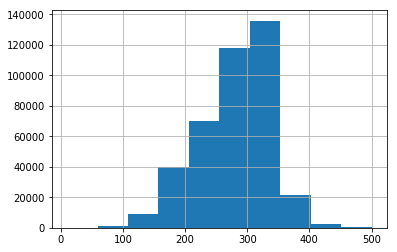

In [7]:
#What is the distribution of the SSL scores?

df["SSL SCORE"].hist()

### DEMO: Dummy Coding and Data Clean Up

In [8]:
df.columns

Index([u'SSL SCORE', u'SEX CODE CD', u'RACE CODE CD', u'AGE CURR'], dtype='object')

In [9]:
df.shape

(398684, 4)

In [10]:
df.isnull().sum()

SSL SCORE         0
SEX CODE CD       0
RACE CODE CD      0
AGE CURR        241
dtype: int64

In [11]:
df["AGE CURR"].value_counts()

20-30           142720
30-40            98975
40-50            63217
50-60            41602
less than 20     38329
60-70            12014
70-80             1586
Name: AGE CURR, dtype: int64

In [12]:
df["AGE CURR"].value_counts(normalize=True)

20-30          0.358
30-40          0.248
40-50          0.159
50-60          0.104
less than 20   0.096
60-70          0.030
70-80          0.004
Name: AGE CURR, dtype: float64

#### 1. Create binary coding for each category

In [13]:
temp = pd.get_dummies(df["AGE CURR"], prefix= "AGE")
temp.columns

Index([u'AGE_20-30', u'AGE_30-40', u'AGE_40-50', u'AGE_50-60', u'AGE_60-70',
       u'AGE_70-80', u'AGE_less than 20'],
      dtype='object')

####  2. Make Age 20-30 the Reference Category

In [14]:
temp.drop(["AGE_20-30"], axis=1, inplace=True )
temp.columns #note AGE_20-30 is gone

Index([u'AGE_30-40', u'AGE_40-50', u'AGE_50-60', u'AGE_60-70', u'AGE_70-80',
       u'AGE_less than 20'],
      dtype='object')

#### 3. Add new columns back into the analytic dataframe 

In [15]:
df_age = pd.concat([df, temp], axis=1)

In [16]:
df_age.columns

Index([u'SSL SCORE', u'SEX CODE CD', u'RACE CODE CD', u'AGE CURR',
       u'AGE_30-40', u'AGE_40-50', u'AGE_50-60', u'AGE_60-70', u'AGE_70-80',
       u'AGE_less than 20'],
      dtype='object')

#### Rename columns to remove spaces

In [17]:
df_age.rename(columns={'SSL SCORE': 'SSL_SCORE','AGE_less than 20':'underTwenty', 'AGE_30-40':'Thirty', 'AGE_40-50':'Forty', 'AGE_50-60': 'Fifty', 'AGE_60-70':'Sixty', 'AGE_70-80':'Seventy'}, 
              inplace=True)

In [18]:
df_age.columns

Index([u'SSL_SCORE', u'SEX CODE CD', u'RACE CODE CD', u'AGE CURR', u'Thirty',
       u'Forty', u'Fifty', u'Sixty', u'Seventy', u'underTwenty'],
      dtype='object')

#### See Dummies in Action

In [19]:
lm = smf.ols(formula='SSL_SCORE ~ underTwenty + Thirty + Forty + Fifty + Sixty + Seventy', 
             data=df_age).fit()
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SSL_SCORE   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                 5.184e+05
Date:                Wed, 16 May 2018   Prob (F-statistic):               0.00
Time:                        17:26:57   Log-Likelihood:            -1.7510e+06
No. Observations:              398684   AIC:                         3.502e+06
Df Residuals:                  398677   BIC:                         3.502e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     320.4938      0.052   6198.825      0.000     320.392     320.595
underTwenty    36.1004      0.112    321.054      0.000      35.880      36.321
Thirty        -43.0443      0.081   -532.497      0.000     -43.203     -42.886
Forty         -87.1726      0.093   -933.610      0.000     -87.356     -86.990
Fifty        -130.0595      0.109  -1194.308      0.000    -130.273    -129.846
Sixty        -171.7509      0.186   -924.915      0.000    -172.115    -171.387
Seventy      -218.5216      0.494   -442.722      0.000    -219.489    -217.554
==============================================================================
Omnibus:                   107007.048   Durbin-Watson:                   1.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8958882.786
Skew:                           0.261   Prob(JB):                         0.00
Kurtosis:                      26.217   Cond. No.                         16.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Create dummies for Sex and Race 

In [20]:
#What are the different race categories?
df["RACE CODE CD"].unique()

array(['BLK', 'WHI', 'WWH', 'API', 'WBH', 'U', 'I'], dtype=object)

In [21]:
#What are the counts of each race?
df["RACE CODE CD"].value_counts()


BLK    207842
WWH     99710
WHI     82366
API      4617
WBH      1974
U        1899
I         276
Name: RACE CODE CD, dtype: int64

In [22]:
#what are the percentages of each category? 
df["RACE CODE CD"].value_counts(normalize=True)

BLK   0.521
WWH   0.250
WHI   0.207
API   0.012
WBH   0.005
U     0.005
I     0.001
Name: RACE CODE CD, dtype: float64

#### 1. Create binary coding for each category¶

In [23]:
temp = pd.get_dummies(df["RACE CODE CD"], prefix= "RACE")
# test.drop(test["RACE_BLK"], axis=1, inplace=True )
temp.columns


Index([u'RACE_API', u'RACE_BLK', u'RACE_I', u'RACE_U', u'RACE_WBH',
       u'RACE_WHI', u'RACE_WWH'],
      dtype='object')

#### 2. Make "RACE_BLK:" the Reference Category

In [24]:
temp.drop(["RACE_BLK"], axis=1, inplace=True )

In [25]:
temp.columns

Index([u'RACE_API', u'RACE_I', u'RACE_U', u'RACE_WBH', u'RACE_WHI',
       u'RACE_WWH'],
      dtype='object')

#### 3. Add new columns back into the analytic dataframe 

In [26]:
df_age_race = pd.concat([df_age, temp], axis=1)
df_age_race.columns


Index([u'SSL_SCORE', u'SEX CODE CD', u'RACE CODE CD', u'AGE CURR', u'Thirty',
       u'Forty', u'Fifty', u'Sixty', u'Seventy', u'underTwenty', u'RACE_API',
       u'RACE_I', u'RACE_U', u'RACE_WBH', u'RACE_WHI', u'RACE_WWH'],
      dtype='object')

#### confirm your columns match these:

Index([u'SSL_SCORE', u'SEX CODE CD', u'RACE CODE CD', u'AGE CURR', u'Thirty',
       u'Forty', u'Fifty', u'Sixty', u'Seventy', u'underTwenty', u'RACE_API',
       u'RACE_I', u'RACE_U', u'RACE_WBH', u'RACE_WHI', u'RACE_WWH'],
      dtype='object')

#### 4. Run a model with the race variables

In [27]:
lm = smf.ols(formula='SSL_SCORE ~ RACE_API + RACE_I + RACE_U + RACE_WBH + RACE_WHI + RACE_WWH', 
             data=df_age_race).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SSL_SCORE   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     580.2
Date:                Wed, 16 May 2018   Prob (F-statistic):               0.00
Time:                        17:26:58   Log-Likelihood:            -2.1828e+06
No. Observations:              398684   AIC:                         4.366e+06
Df Residuals:                  398677   BIC:                         4.366e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    282.4262      0.127   2229.749      0.000     282.178     282.674
RACE_API     -12.9924      0.859    -15.121      0.000     -14.676     -11.308
RACE_I       -14.0856      3.478     -4.050      0.000     -20.903      -7.269
RACE_U        -5.7443      1.331     -4.315      0.000      -8.353      -3.135
RACE_WBH       3.0049      1.306      2.301      0.021       0.445       5.564
RACE_WHI     -12.7024      0.238    -53.426      0.000     -13.168     -12.236
RACE_WWH       0.8415      0.222      3.783      0.000       0.406       1.278
==============================================================================
Omnibus:                    13796.340   Durbin-Watson:                   0.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15270.626
Skew:                          -0.477   Prob(JB):                         0.00
Kurtosis:                       3.101   Cond. No.                         40.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Which variables/features are statisically significant? Why?

Answer: API, I, U, WHI, WBH, WWH p-value is less than 0.05

#### Which variables/features are not statisically significant? Why?

Answer: No features have a p-value that is greater than 0.05

#### Make a dummy variable for Sex

In [28]:
df_age_race["SEX CODE CD"].value_counts()

M    302320
F     96307
X        57
Name: SEX CODE CD, dtype: int64

In [29]:
df["SEX CODE CD"].value_counts()

M    302320
F     96307
X        57
Name: SEX CODE CD, dtype: int64

#### Drop the X category 

In [30]:
df_all = df_age_race[df_age_race["SEX CODE CD"] != "X"]
df_all["SEX CODE CD"].value_counts()

M    302320
F     96307
Name: SEX CODE CD, dtype: int64

In [31]:
df_all.columns

Index([u'SSL_SCORE', u'SEX CODE CD', u'RACE CODE CD', u'AGE CURR', u'Thirty',
       u'Forty', u'Fifty', u'Sixty', u'Seventy', u'underTwenty', u'RACE_API',
       u'RACE_I', u'RACE_U', u'RACE_WBH', u'RACE_WHI', u'RACE_WWH'],
      dtype='object')

#### Create binary indicators for sex

In [32]:
temp = pd.get_dummies(df_all["SEX CODE CD"], prefix= "SEX")
temp.columns

Index([u'SEX_F', u'SEX_M'], dtype='object')

#### Set female as the reference category

In [33]:
temp.drop(["SEX_F"], axis=1, inplace=True )
df_all = pd.concat([df_all, temp], axis=1)

In [34]:
df_all.columns

Index([u'SSL_SCORE', u'SEX CODE CD', u'RACE CODE CD', u'AGE CURR', u'Thirty',
       u'Forty', u'Fifty', u'Sixty', u'Seventy', u'underTwenty', u'RACE_API',
       u'RACE_I', u'RACE_U', u'RACE_WBH', u'RACE_WHI', u'RACE_WWH', u'SEX_M'],
      dtype='object')

### Evaluate crude model

In [35]:
lm = smf.ols(formula='SSL_SCORE ~ SEX_M', 
             data=df_all).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SSL_SCORE   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     494.9
Date:                Wed, 16 May 2018   Prob (F-statistic):          1.43e-109
Time:                        17:26:59   Log-Likelihood:            -2.1840e+06
No. Observations:              398627   AIC:                         4.368e+06
Df Residuals:                  398625   BIC:                         4.368e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    283.4600      0.187   1517.729      0.000     283.094     283.826
SEX_M         -4.7709      0.214    -22.246      0.000      -5.191      -4.351
==============================================================================
Omnibus:                    13069.070   Durbin-Watson:                   0.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14387.352
Skew:                          -0.460   Prob(JB):                         0.00
Kurtosis:                       3.141   Cond. No.                         3.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Write the finding in a sentence. Was this finding statistically significant?

Answer: Men have approximately 5 fewer SSL_SCORE points compared to women in our sample. this is statistically significant

#### Let's try a full model 

In [36]:
lm = smf.ols(formula='SSL_SCORE ~ SEX_M + underTwenty + Thirty + Forty + Fifty + Sixty + Seventy + RACE_API + RACE_I + RACE_U + RACE_WBH + RACE_WHI + RACE_WWH', 
             data=df_all).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SSL_SCORE   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                 2.444e+05
Date:                Wed, 16 May 2018   Prob (F-statistic):               0.00
Time:                        17:26:59   Log-Likelihood:            -1.7469e+06
No. Observations:              398627   AIC:                         3.494e+06
Df Residuals:                  398613   BIC:                         3.494e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     320.2405      0.079   4076.566      0.000     320.086     320.394
SEX_M           3.2855      0.072     45.629      0.000       3.144       3.427
underTwenty    35.7471      0.112    320.386      0.000      35.528      35.966
Thirty        -42.8921      0.080   -535.088      0.000     -43.049     -42.735
Forty         -87.1152      0.093   -941.389      0.000     -87.297     -86.934
Fifty        -130.3972      0.108  -1204.724      0.000    -130.609    -130.185
Sixty        -172.1351      0.184   -933.670      0.000    -172.496    -171.774
Seventy      -218.6212      0.489   -446.904      0.000    -219.580    -217.662
RACE_API       -5.2092      0.288    -18.075      0.000      -5.774      -4.644
RACE_I         -4.4100      1.166     -3.781      0.000      -6.696      -2.124
RACE_U         -5.9759      0.446    -13.386      0.000      -6.851      -5.101
RACE_WBH       -2.5387      0.438     -5.795      0.000      -3.397      -1.680
RACE_WHI       -5.3578      0.080    -67.005      0.000      -5.515      -5.201
RACE_WWH       -3.9709      0.075    -52.806      0.000      -4.118      -3.824
==============================================================================
Omnibus:                   104485.123   Durbin-Watson:                   1.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9207647.093
Skew:                           0.142   Prob(JB):                         0.00
Kurtosis:                      26.543   Cond. No.                         52.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Write up your key findings.

#### What feature increases SSL Score the most? Write the finding in a sentence  


Answer: Being under age 20, compared to being 20-30 years old

#### What feature decreases SSL Score the most? Write the finding in a sentence . 

Answer: Being 70-80, compared to being 20-30 years

#### What was a key finding with race controlling for age and sex?

Answer: may vary 

#### According to the dataset Sex and Race were not used in the creation of the score. Based on our findings do they play a role in the score?

Answer: 

#### Why or why not?

Answer: 

#### What are the implications of this? How is this score used? Is that ethical? 

Answer: 